pandas vs numpy
window function -> satır bazlı işlem
oltp vs olap
acid prensipleri 
crud db dml işlemleri
dml
99 percentage

1st of January, 2023

1 US Dollar = 24.75 Egyptian Pound
1 Turkish Lira = 1.32 Egyptian Pound

So 100 Turkish Liras ~ 130 Egyptian Pound

In [848]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [849]:
new_df = pd.read_csv(".devcontainer/new_cars_prices.csv")
used_df = pd.read_csv(".devcontainer/used_car_prices.csv")

print(new_df.info())
print("\n2nd DATASET\n")
print(used_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   web-scraper-order  3433 non-null   object
 1   Car Model          3433 non-null   object
 2   Old Price          3433 non-null   object
 3   Price Change       3433 non-null   object
 4   New Price          3433 non-null   object
 5   date_range         3433 non-null   object
dtypes: object(6)
memory usage: 161.0+ KB
None

2nd DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79090 entries, 0 to 79089
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   web-scraper-order  79090 non-null  object
 1   Car Model          79090 non-null  object
 2   Month/Year         78612 non-null  object
 3   Average price      78612 non-null  object
 4   Minimum price      78612 non-null  object
 5   Maximum price  

In [850]:
#Drop the useless column
new_df.drop('web-scraper-order', axis=1, inplace=True)
used_df.drop('web-scraper-order', axis=1, inplace=True)

In [851]:
#Get rid of dupes
new_df.dropna(inplace = True)
new_df.drop_duplicates(inplace = True)
used_df.dropna(inplace = True)
used_df.drop_duplicates(inplace = True)

duplicates1 = new_df.duplicated().sum()
duplicates2 = new_df.duplicated().sum()

print(f"Number of duplicates: {duplicates1} and {duplicates2}")

Number of duplicates: 0 and 0


In [852]:
print(new_df.columns)
print(used_df.columns)

Index(['Car Model', 'Old Price', 'Price Change', 'New Price', 'date_range'], dtype='object')
Index(['Car Model', 'Month/Year', 'Average price', 'Minimum price',
       'Maximum price'],
      dtype='object')


In [853]:
print(new_df.dtypes)
print("\n")
print(used_df.dtypes)

Car Model       object
Old Price       object
Price Change    object
New Price       object
date_range      object
dtype: object


Car Model        object
Month/Year       object
Average price    object
Minimum price    object
Maximum price    object
dtype: object


In [854]:
print(new_df.sample(5))
print("\n")
print(used_df.sample(5))

                                        Car Model       Old Price  \
126             Chery Tiggo 7 A/T / Baseline 2022    354,000\nEGP   
957                      Suzuki Alto Manual‏ 2022    159,900\nEGP   
1801   Peugeot 508 A/T / GT MAX Red Interior 2022    839,990\nEGP   
3292  Peugeot 508 A/T / GT Line Red Interior 2023  1,234,990\nEGP   
139             Chery Tiggo 7 A/T / Highline 2022    345,000\nEGP   

                    Price Change       New Price  date_range  
126    trending_up\n+25,000\nEGP    379,000\nEGP  01/09/2022  
957     trending_up\n+2,000\nEGP    161,900\nEGP  04/07/2022  
1801   trending_up\n+15,000\nEGP    854,990\nEGP  24/07/2022  
3292  trending_up\n+100,000\nEGP  1,334,990\nEGP  22/03/2023  
139    trending_up\n+20,000\nEGP    365,000\nEGP  07/04/2022  


                   Car Model Month/Year Average price Minimum price  \
55350      Daewoo Lanos 2007    2014-04    52,000 EGP    49,000 EGP   
38347           BMW 320 2009    2022-10   333,000 EGP   333,000

In [855]:
# Clean and convert to string
new_df['New Price'] = new_df['New Price'].str.replace(',', '').str.replace('EGP', '').astype(float)
new_df["Old Price"]= new_df["Old Price"].str.replace(',', '').str.replace('EGP', '').astype(float)

new_df['Price Change'] = new_df['Price Change'].str.replace(r'[^-\d]+', '').astype(float)

new_df['Car Brand'] = new_df['Car Model'].apply(lambda i:"".join(i.split(" ")[0]))
new_df['Car_Model_Name'] = new_df['Car Model'].apply(lambda i:" ".join(i.split(" ")[1:-1]))
new_df['Car_Model_Year'] = new_df['Car Model'].apply(lambda i:"".join(i.split(" ")[-1]))

new_df.sample(5)

/tmp/ipykernel_8885/4120024754.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



,Car Model,Old Price,Price Change,New Price,date_range,Car Brand,Car_Model_Name,Car_Model_Year
760,MG Rx5 A/T / Luxury 2022,510000.0,20000.0,530000.0,04/07/2022,MG,Rx5 A/T / Luxury,2022
1956,Skoda Kodiaq A/T / L&K 2022,1725000.0,50000.0,1775000.0,05/03/2023,Skoda,Kodiaq A/T / L&K,2022
1663,Citroën C4 A/T / Red interior 2022,534900.0,19000.0,553900.0,01/05/2022,Citroën,C4 A/T / Red interior,2022
1028,Chery Tiggo 7 pro A/T / Luxury 2022,710000.0,20000.0,730000.0,18/12/2022,Chery,Tiggo 7 pro A/T / Luxury,2022
3253,Fiat 500 X A/T / Cross 2023,935000.0,40000.0,975000.0,02/03/2023,Fiat,500 X A/T / Cross,2023


In [856]:
new_df["Price Change"].head()

0    -82876.0
1    184149.0
2    -93000.0
3    125124.0
4   -350000.0
Name: Price Change, dtype: float64

In [857]:
used_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78612 entries, 0 to 79089
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      78612 non-null  object
 1   Month/Year     78612 non-null  object
 2   Average price  78612 non-null  object
 3   Minimum price  78612 non-null  object
 4   Maximum price  78612 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB


In [858]:
used_df.head()

,Car Model,Month/Year,Average price,Minimum price,Maximum price
0,Skoda Octavia A8 2022,2023-03,"967,000 EGP","926,000 EGP","1,017,000 EGP"
1,Skoda Octavia A8 2022,2023-02,"979,000 EGP","931,000 EGP","1,045,000 EGP"
2,Skoda Octavia A8 2022,2023-01,"917,000 EGP","893,000 EGP","950,000 EGP"
3,Skoda Octavia A8 2022,2022-12,"881,000 EGP","793,000 EGP","950,000 EGP"
4,Skoda Octavia A8 2022,2022-11,"868,000 EGP","789,000 EGP","950,000 EGP"


In [859]:
used_df["Average price"] = used_df["Average price"].astype(str).str.replace(',', '').str.replace('EGP', '').astype(float)
used_df["Minimum price"] = used_df["Minimum price"].astype(str).str.replace(',', '').str.replace('EGP', '').astype(float)
used_df["Maximum price"] = used_df["Maximum price"].astype(str).str.replace(',', '').str.replace('EGP', '').astype(float)

In [860]:
used_df.sample(5)

,Car Model,Month/Year,Average price,Minimum price,Maximum price
44950,Senova A1 2016,2020-11,109000.0,105000.0,118000.0
13040,Chevrolet Lanos 2018,2019-02,150000.0,147000.0,157000.0
46287,Volkswagen Passat 2000,2018-04,118000.0,108000.0,130000.0
33584,Hyundai IX 35 2015,2019-10,314000.0,295000.0,333000.0
12615,Nissan Sunny 2007,2016-08,83000.0,73000.0,90000.0


       Average price  Minimum price  Maximum price
0           967000.0       926000.0      1017000.0
1           979000.0       931000.0      1045000.0
2           917000.0       893000.0       950000.0
3           881000.0       793000.0       950000.0
4           868000.0       789000.0       950000.0
...              ...            ...            ...
79085        30000.0        26000.0        33000.0
79086        33000.0        32000.0        35000.0
79087        28000.0        25000.0        30000.0
79088        27000.0        25000.0        28000.0
79089        24000.0        23000.0        26000.0

[78612 rows x 3 columns]


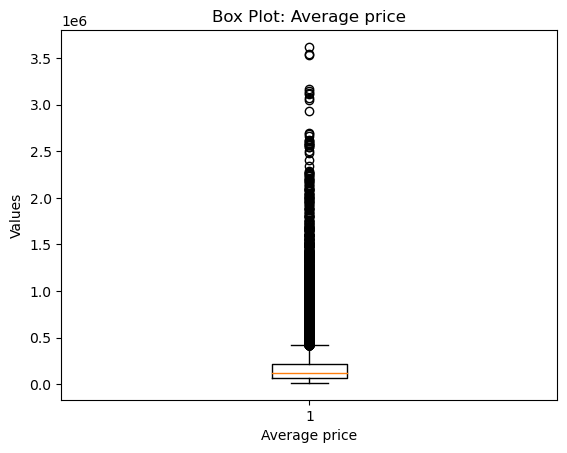

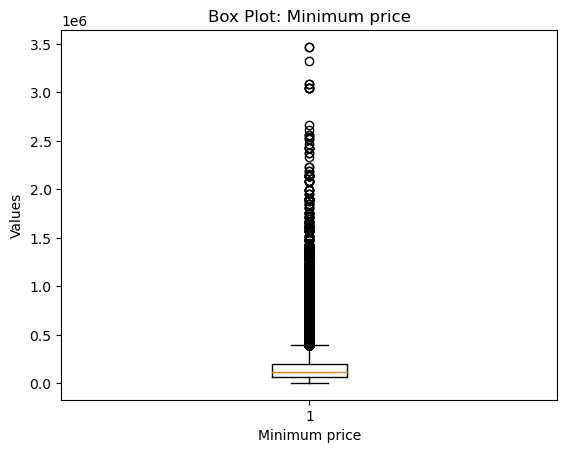

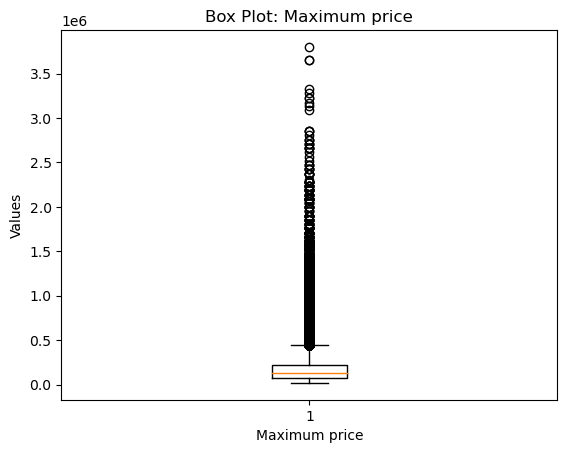

In [861]:
#check for outliers in boxplot

# df for new cars, df2 for used cars
#num_df = new_df.select_dtypes(include = "number")
num_df2 = used_df.select_dtypes(include = "number")
#print(num_df)
print(num_df2)

"""
for column in num_df.columns:
    plt.boxplot(num_df[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title('Box Plot: {}'.format(column))
    plt.show()
"""
for column in num_df2.columns:
    plt.boxplot(num_df2[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title('Box Plot: {}'.format(column))
    plt.show()


       Average price  Minimum price  Maximum price
5           797000.0       789000.0       808000.0
6           837000.0       770000.0       874000.0
7           779000.0       722000.0       855000.0
8           675000.0       608000.0       722000.0
9           612000.0       580000.0       665000.0
...              ...            ...            ...
79085        30000.0        26000.0        33000.0
79086        33000.0        32000.0        35000.0
79087        28000.0        25000.0        30000.0
79088        27000.0        25000.0        28000.0
79089        24000.0        23000.0        26000.0

[77646 rows x 3 columns]


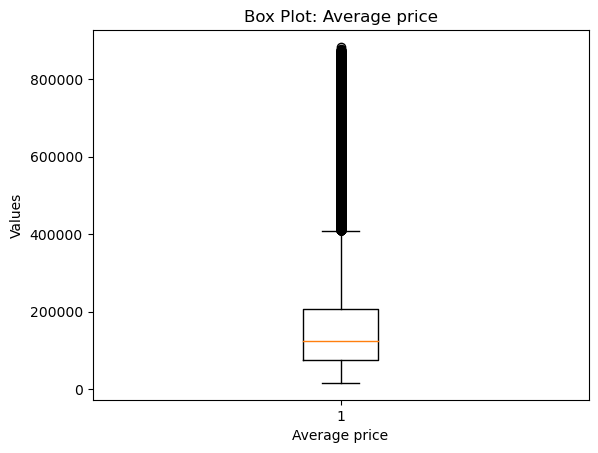

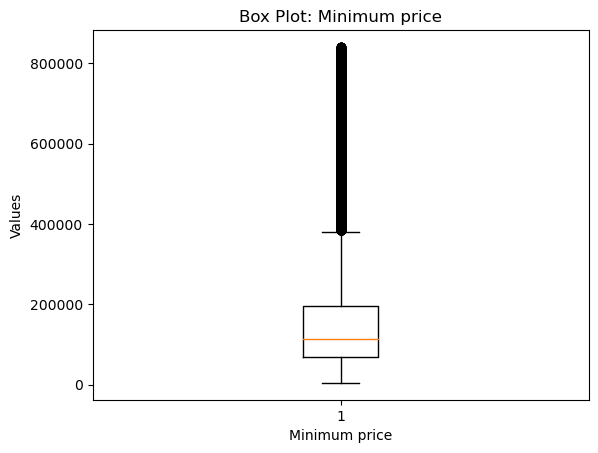

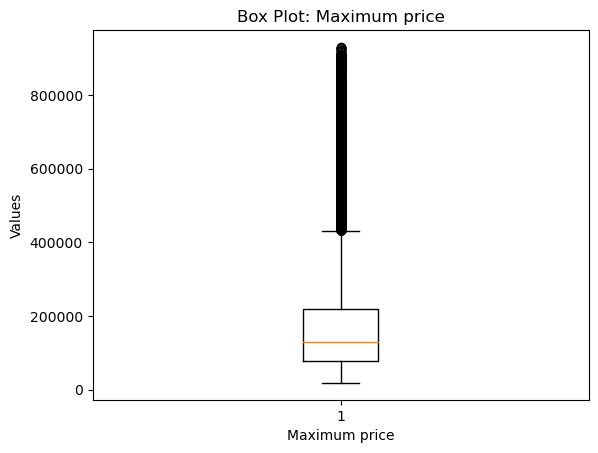

In [862]:
# Get rid of outliers

threshold = 5

# Iterate over each column in num_df
"""
for column in num_df.columns:
    # Calculate the IQR
    q1 = num_df[column].quantile(0.25)
    q3 = num_df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Filter out the outliers
    num_df[column] = np.where(
        (num_df[column] >= lower_bound) & (num_df[column] <= upper_bound),
        num_df[column],
        np.nan
    )

    num_df = num_df.dropna(how='any')
"""
for column in num_df2.columns:
    # Calculate the IQR
    q1 = num_df2[column].quantile(0.25)
    q3 = num_df2[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Filter out the outliers
    num_df2[column] = np.where(
        (num_df2[column] >= lower_bound) & (num_df2[column] <= upper_bound),
        num_df2[column],
        np.nan
    )
    
    num_df2 = num_df2.dropna(how='any')

# Display the modified DataFrame
#print(num_df)
print(num_df2)

"""
for column in num_df.columns:
    plt.boxplot(num_df[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title('Box Plot: {}'.format(column))
    plt.show()
"""

for column in num_df2.columns:
    plt.boxplot(num_df2[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title('Box Plot: {}'.format(column))
    plt.show()



In [863]:
# Update the original DF with outliers removed
"""
new_df["New Price"] = num_df["New Price"]
new_df["Old Price"] = num_df["Old Price"]
new_df["Price Change"] = num_df["Price Change"]
"""
used_df["Average price"] = num_df2["Average price"]
used_df["Minimum price"] = num_df2["Minimum price"]
used_df["Maximum price"] = num_df2["Maximum price"]

In [864]:
print(used_df.head())
print(new_df.head())

               Car Model Month/Year  Average price  Minimum price  \
0  Skoda Octavia A8 2022    2023-03            NaN            NaN   
1  Skoda Octavia A8 2022    2023-02            NaN            NaN   
2  Skoda Octavia A8 2022    2023-01            NaN            NaN   
3  Skoda Octavia A8 2022    2022-12            NaN            NaN   
4  Skoda Octavia A8 2022    2022-11            NaN            NaN   

   Maximum price  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
                          Car Model  Old Price  Price Change  New Price  \
0  Porsche Cayenne A/T / Coupe 2020  2262876.0      -82876.0  2180000.0   
1  Porsche Cayenne A/T / Coupe 2020  2078727.0      184149.0  2262876.0   
2      Porsche Cayenne A/T / S 2020  2388000.0      -93000.0  2295000.0   
3      Porsche Cayenne A/T / S 2020  2262876.0      125124.0  2388000.0   
4        Lexus LX 570 Automtic 2020  5600000.0     -350000.0  5250000.0   

   date_range Car Br

In [865]:
# Get rid of null values
new_df = new_df.dropna(how='any')
used_df = used_df.dropna(how='any')
print(new_df.sample(5))
print(used_df.sample(5))

                                    Car Model  Old Price  Price Change  \
1754    Suzuki Swift A/T / screen (2ton) 2022   239900.0        5000.0   
27    Toyota Corolla Automatic / Elgance 2022   499000.0       35000.0   
2910           Skoda Karoq A/T / Dynamic 2022   900000.0       90000.0   
406             Haval H6 A/T / Deluxe SR 2022   925000.0       25000.0   
2765                Audi Q3 A/T / S-Line 2022   815000.0       84000.0   

      New Price  date_range Car Brand               Car_Model_Name  \
1754   244900.0  12/03/2022    Suzuki    Swift A/T / screen (2ton)   
27     534000.0  18/07/2022    Toyota  Corolla Automatic / Elgance   
2910   990000.0  14/12/2022     Skoda          Karoq A/T / Dynamic   
406    950000.0  15/01/2023     Haval           H6 A/T / Deluxe SR   
2765   899000.0  11/05/2022      Audi              Q3 A/T / S-Line   

     Car_Model_Year  
1754           2022  
27             2022  
2910           2022  
406            2022  
2765           2022  
  

In [866]:
# Handle the date_range column of new_df
new_df['date_range'] = pd.to_datetime(new_df['date_range'], format='%d/%m/%Y')

# Extract the date, month, and year into separate columns
new_df['Date'] = new_df['date_range'].dt.day
new_df['Month'] = new_df['date_range'].dt.month
new_df['Model Year'] = new_df['date_range'].dt.year

new_df = new_df.drop("Car_Model_Year", axis=1)

new_df.sample(5)


,Car Model,Old Price,Price Change,New Price,date_range,Car Brand,Car_Model_Name,Date,Month,Model Year
1265,Ford Focus A/T / Trend 4d 2022,450000.0,20000.0,470000.0,2022-06-15,Ford,Focus A/T / Trend 4d,15,6,2022
919,MG HS A/T / Luxury Brown Interior 2022,555000.0,20000.0,575000.0,2022-07-04,MG,HS A/T / Luxury Brown Interior,4,7,2022
1966,Skoda Superb A/T / Ambition 2022,1350000.0,50000.0,1400000.0,2023-03-05,Skoda,Superb A/T / Ambition,5,3,2023
3116,BMW 218 i A/T / Sport Line 2023,1120000.0,330000.0,1450000.0,2023-01-23,BMW,218 i A/T / Sport Line,23,1,2023
1072,Renault Logan A/T / E3 / Black Edtion 2022,295000.0,74000.0,369000.0,2022-11-03,Renault,Logan A/T / E3 / Black Edtion,3,11,2022


In [867]:
# Handle the Month/Year column of used_df
used_df['Month/Year'] = pd.to_datetime(used_df['Month/Year'])

# Extract the year and month into separate columns
used_df['Year'] = used_df['Month/Year'].dt.year
used_df['Month'] = used_df['Month/Year'].dt.month

used_df.sample(5)

,Car Model,Month/Year,Average price,Minimum price,Maximum price,Year,Month
5029,Nissan Sunny 2011,2020-04-01,138000.0,128000.0,147000.0,2020,4
61685,Kia Spectra 2005,2019-08-01,79000.0,76000.0,81000.0,2019,8
14219,Suzuki Van 2019,2019-08-01,131000.0,128000.0,133000.0,2019,8
57851,Daewoo Lanos 2006,2022-01-01,75000.0,71000.0,81000.0,2022,1
49565,Chevrolet Aveo 2006,2022-04-01,81000.0,75000.0,86000.0,2022,4


In [868]:
# Add Car Brand column to used_df
used_df['Car Brand'] = used_df['Car Model'].apply(lambda i:"".join(i.split(" ")[0]))
used_df.head()

,Car Model,Month/Year,Average price,Minimum price,Maximum price,Year,Month,Car Brand
5,Skoda Octavia A8 2022,2022-10-01,797000.0,789000.0,808000.0,2022,10,Skoda
6,Skoda Octavia A8 2022,2022-09-01,837000.0,770000.0,874000.0,2022,9,Skoda
7,Skoda Octavia A8 2022,2022-08-01,779000.0,722000.0,855000.0,2022,8,Skoda
8,Skoda Octavia A8 2022,2022-07-01,675000.0,608000.0,722000.0,2022,7,Skoda
9,Skoda Octavia A8 2022,2022-06-01,612000.0,580000.0,665000.0,2022,6,Skoda


In [869]:
filtered_df = new_df[new_df['Car Brand'] == 'Ds']

print(filtered_df)

                               Car Model  Old Price  Price Change   New Price  \
3153  Ds DS7 A/T / Performance line 2022   710000.0    12290000.0  13000000.0   
3154  Ds DS7 A/T / Performance line 2022   670000.0       40000.0    710000.0   
3155  Ds DS7 A/T / Performance plus 2022   755000.0      545000.0   1300000.0   
3156  Ds DS7 A/T / Performance plus 2022   710000.0       45000.0    755000.0   

     date_range Car Brand              Car_Model_Name  Date  Month  Model Year  
3153 2022-12-11        Ds  DS7 A/T / Performance line    11     12        2022  
3154 2022-03-20        Ds  DS7 A/T / Performance line    20      3        2022  
3155 2022-12-11        Ds  DS7 A/T / Performance plus    11     12        2022  
3156 2022-03-20        Ds  DS7 A/T / Performance plus    20      3        2022  


In [870]:
# There is an absurd amount of change (12290000 EGP) in the price of the model below, so it was removed
new_df = new_df[(new_df['Car Model'] != 'Ds DS7 A/T / Performance line 2022') & (new_df['Price Change'] != 12290000.0)]

filtered_df = new_df[new_df['Car Brand'] == 'Ds']

print(filtered_df)

                               Car Model  Old Price  Price Change  New Price  \
3155  Ds DS7 A/T / Performance plus 2022   755000.0      545000.0  1300000.0   
3156  Ds DS7 A/T / Performance plus 2022   710000.0       45000.0   755000.0   

     date_range Car Brand              Car_Model_Name  Date  Month  Model Year  
3155 2022-12-11        Ds  DS7 A/T / Performance plus    11     12        2022  
3156 2022-03-20        Ds  DS7 A/T / Performance plus    20      3        2022  


In [871]:
#Highest price by Car Model USING PANDAS

"""
models = used_df["Car Model"]
prices = used_df["Average price"]

# Create a new DataFrame with the "brands" and "prices" columns
data = pd.DataFrame({"Car Model": models, "Average Price": prices})

# Create the bar graph using pandas plot function
data.plot.bar(x="Car Model", y="Average Price", rot=45)
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.title('Highest Price by Model')
plt.show()
"""
# Kernel interrupt at 6 minutes, probably unable to process size of data -> Unable for pandas

'\nmodels = used_df["Car Model"]\nprices = used_df["Average price"]\n\n# Create a new DataFrame with the "brands" and "prices" columns\ndata = pd.DataFrame({"Car Model": models, "Average Price": prices})\n\n# Create the bar graph using pandas plot function\ndata.plot.bar(x="Car Model", y="Average Price", rot=45)\nplt.xlabel(\'Car Model\')\nplt.ylabel(\'Price\')\nplt.title(\'Highest Price by Model\')\nplt.show()\n'

In [872]:
used_df.rename(columns={'Average price': 'Average Price', 
                        'Minimum price': 'Minimum Price', 
                        'Maximum price': 'Maximum Price'}, inplace=True)


In [964]:
new_df['Car Brand'] = new_df['Car Brand'].replace('Great', 'Great Wall Motors')
used_df['Car Brand'] = used_df['Car Brand'].replace('Great', 'Great Wall Motors')

Data cleaning is mostly over
The rest is answering the questions

Question List:

Which car brand has the highest average price?
What are the most expensive car models sold most recently?
How does the price of a car vary with its age?
Which transmission type is more popular among car buyers?
What is the distribution of car prices across different car brands?
Which car brand has the highest resale value?
How does the price of a car vary with its condition (i.e., new vs. used)?
Is there a relationship between the price of a car and its brand?

Car Brand
Lexus         4.338000e+06
Porsche       2.921078e+06
BMW           2.745806e+06
Mercedes      2.587717e+06
Volvo         1.994062e+06
Audi          1.472043e+06
Mini          1.326111e+06
Alfa          1.202000e+06
Volkswagen    1.175062e+06
Jeep          1.097685e+06
Name: New Price, dtype: float64


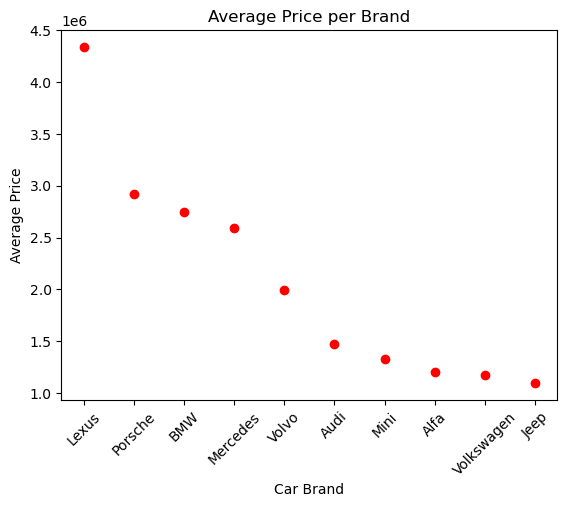

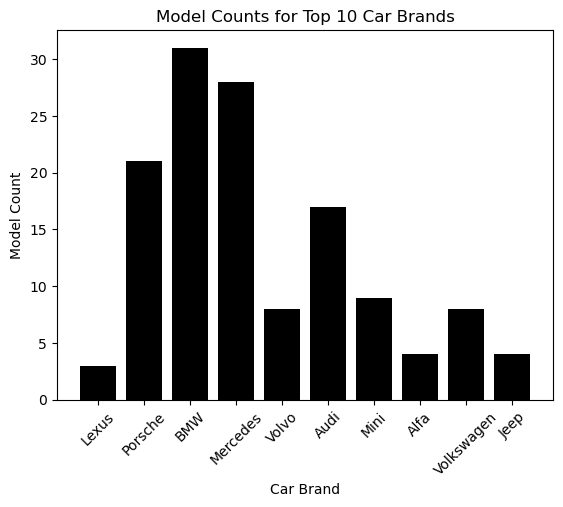

In [873]:
# Q1: Which car brand has the highest average price?

# Group the mean of the prices of new cars for each brand
average_price_per_brand = new_df.groupby("Car Brand")["New Price"].mean().sort_values(ascending=False)
top10 = average_price_per_brand.head(10)

# Create the line graph
plt.plot(top10.index, top10, marker='o', color='red', linestyle='')

plt.xlabel('Car Brand')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.title('Average Price per Brand')
plt.show()

# Graph the number of non-unique car models for the car brands in the top10 
model_counts = new_df.groupby("Car Brand")["Car Model"].nunique()
top10_brands = top10.index
top10_model_counts = model_counts.loc[top10_brands]
plt.bar(top10_model_counts.index, top10_model_counts, color='black')

plt.xlabel('Car Brand')
plt.ylabel('Model Count')
plt.title('Model Counts for Top 10 Car Brands')
plt.xticks(rotation=45)

plt.show()

The most expensive brand is Lexus. However, it should also be noted that this brand has less than 5 models.

In [874]:
# Q2 What are the most expensive car models sold most recently?

# Filter used_df for year 2023 and month 3, these are the most recent date values in the dataframe
filtered_df = used_df[(used_df['Year'] == 2023) & (used_df['Month'] == 3)]
top10_expensive_cars = filtered_df.nlargest(10, 'Average Price')

print(top10_expensive_cars[["Car Model", "Average Price", "Month", "Year"]])

                         Car Model  Average Price  Month  Year
503        Hyundai Tucson GDI 2021       865000.0      3  2023
523                   BMW 320 2016       845000.0      3  2023
582            Mercedes E 250 2010       844000.0      3  2023
629               Peugeot 508 2021       841000.0      3  2023
643              Kia Sportage 2021       835000.0      3  2023
666                    BMW X1 2017       835000.0      3  2023
685            Opel Grandland 2021       834000.0      3  2023
702               Peugeot 508 2020       831000.0      3  2023
729  Hyundai Tucson Turbo GDI 2020       829000.0      3  2023
751                Citroën C5 2021       828000.0      3  2023


                          Car Model  Average Price
Year Month                                        
2012 1        Volkswagen Jetta 2008       127000.0
     2             Honda Civic 2009       124000.0
     3        Volkswagen Jetta 2008       124000.0
     4          Toyota Corolla 2009       122000.0
     5        Volkswagen Jetta 2008       124000.0
...                             ...            ...
2022 11           Peugeot 5008 2020       875000.0
     12            Peugeot 508 2021       870000.0
2023 1            Peugeot 5008 2020       870000.0
     2           Jeep Renegade 2022       865000.0
     3      Hyundai Tucson GDI 2021       865000.0

[128 rows x 2 columns]


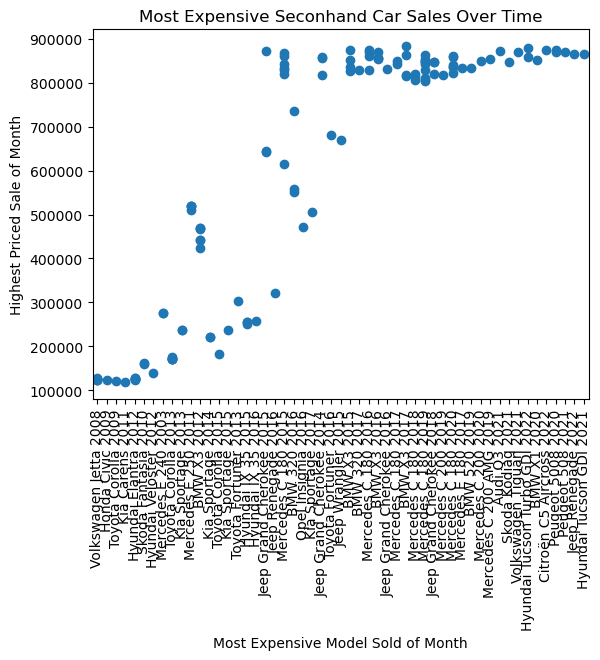

<Figure size 10000x2400 with 0 Axes>

In [1013]:
# Variation of Q2, What are the most expensive car models sold each month?
most_expensive_cars = used_df.groupby(['Year', 'Month']).apply(lambda x: x.loc[x['Average Price'].idxmax(), ['Car Model', 'Average Price']])

print(most_expensive_cars)
# Extract the x-axis (Year and Month) and y-axis (Average Price) data points
x = most_expensive_cars.index
car_models = most_expensive_cars['Car Model']
average_prices = most_expensive_cars['Average Price']

# Convert the x-axis data to a readable format (e.g., 'YYYY-MM')

# Create the line graph
plt.plot(car_models, average_prices, marker='o', linestyle='None')
plt.xlabel('Most Expensive Model Sold of Month')
plt.ylabel('Highest Priced Sale of Month')
plt.title('Most Expensive Seconhand Car Sales Over Time')
plt.xticks(rotation=90)
plt.gca().margins(x=0.01)


plt.figure(figsize=(100, 24))
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [878]:
# Q4 Which transmission type is more popular among car buyers?

# Create a new column for transmission type
new_df['Transmission Type'] = np.where(new_df['Car Model'].str.contains('A/T|Auto|AT', case=True), 'A/T', 'M/T')
new_df.sample(5)

,Car Model,Old Price,Price Change,New Price,date_range,Car Brand,Car_Model_Name,Date,Month,Model Year,Transmission Type
2251,Nissan Sunny A/T / Super Saloon 2023,312000.0,10000.0,322000.0,2022-10-02,Nissan,Sunny A/T / Super Saloon,2,10,2022,A/T
2244,Nissan Sunny A/T / Super Saloon 2023,454000.0,10000.0,464000.0,2023-03-21,Nissan,Sunny A/T / Super Saloon,21,3,2023,A/T
788,Hyundai Creta SU2 A/T / SMART 2022,365000.0,2000.0,367000.0,2021-10-03,Hyundai,Creta SU2 A/T / SMART,3,10,2021,A/T
692,Chery Tiggo 8 Automtic / COMFORT 2022,585000.0,75000.0,660000.0,2022-10-31,Chery,Tiggo 8 Automtic / COMFORT,31,10,2022,A/T
1653,Citroën C4 A/T / Blue interior 2022,539900.0,10000.0,549900.0,2022-07-24,Citroën,C4 A/T / Blue interior,24,7,2022,A/T


In [879]:
# Did the same for used_df, however this won't work since no information about transmission type is given
used_df['Transmission Type'] = np.where(used_df['Car Model'].str.contains('A/T|Auto|AT', case=True), 'A/T', 'M/T')
used_df.sample(5)

,Car Model,Month/Year,Average Price,Minimum Price,Maximum Price,Year,Month,Car Brand,Transmission Type
39832,Kia Ceed 2017,2021-07-01,234000.0,219000.0,247000.0,2021,7,Kia,M/T
8665,Renault Sandero 2014,2019-04-01,138000.0,132000.0,143000.0,2019,4,Renault,M/T
56630,Toyota Corolla 1999,2018-09-01,95000.0,85000.0,105000.0,2018,9,Toyota,M/T
45322,Hyundai I10 2009,2017-08-01,89000.0,85000.0,95000.0,2017,8,Hyundai,M/T
45599,Chevrolet Lanos 2015,2021-12-01,104000.0,98000.0,109000.0,2021,12,Chevrolet,M/T


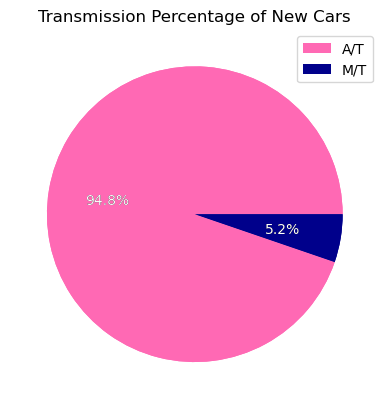

In [880]:
# Calculate the number of each transmission type
transmission_counts = new_df['Transmission Type'].value_counts()

# Calculate the percentage of each transmission type
transmission_percentages = (transmission_counts / transmission_counts.sum()) * 100

# Create a pie chart
colors = ['#FF69B4', '#00008B']  # Pink for A/T and dark blue for M/T

patches, texts, _ = plt.pie(transmission_percentages, colors=colors, autopct='%.1f%%')

# Create the pie chart
plt.pie(transmission_percentages, labels=transmission_percentages.index, autopct='%1.1f%%', 
        colors=colors, textprops={'color': 'white'})

labels = ['A/T', 'M/T']
plt.legend(patches, labels, loc='best')

# Set title
plt.title('Transmission Percentage of New Cars')

plt.show()

Almost 95% of new cars are automatic, which shows just how popular automatic transmissions have become in Egypt.

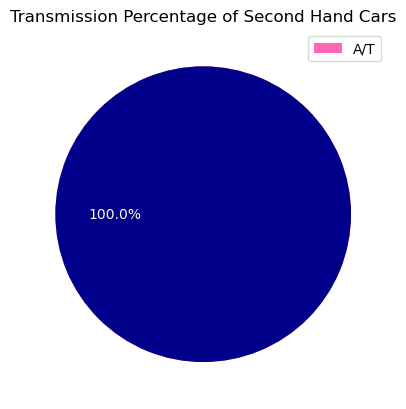

In [881]:
# Calculate the number of each transmission type
transmission_counts = used_df['Transmission Type'].value_counts()

# Calculate the percentage of each transmission type
transmission_percentages = (transmission_counts / transmission_counts.sum()) * 100

patches, texts, _ = plt.pie(transmission_percentages, colors=colors, autopct='%.1f%%')

# Create a pie chart
colors = ['#00008B', '#FF69B4']  # Pink for A/T and dark blue for M/T

# Create the pie chart
plt.pie(transmission_percentages, labels=transmission_percentages.index, autopct='%1.1f%%', 
        colors=colors, textprops={'color': 'white'})

labels = ['A/T', 'M/T']
plt.legend(patches, labels, loc='best')

# Set title
plt.title('Transmission Percentage of Second Hand Cars')

plt.show()

# Since no information about transmission type is presented in the used_df, this piechart is faulty

No transmission data provided for second-hand cars. Therefore, the piechart above is not accurate.

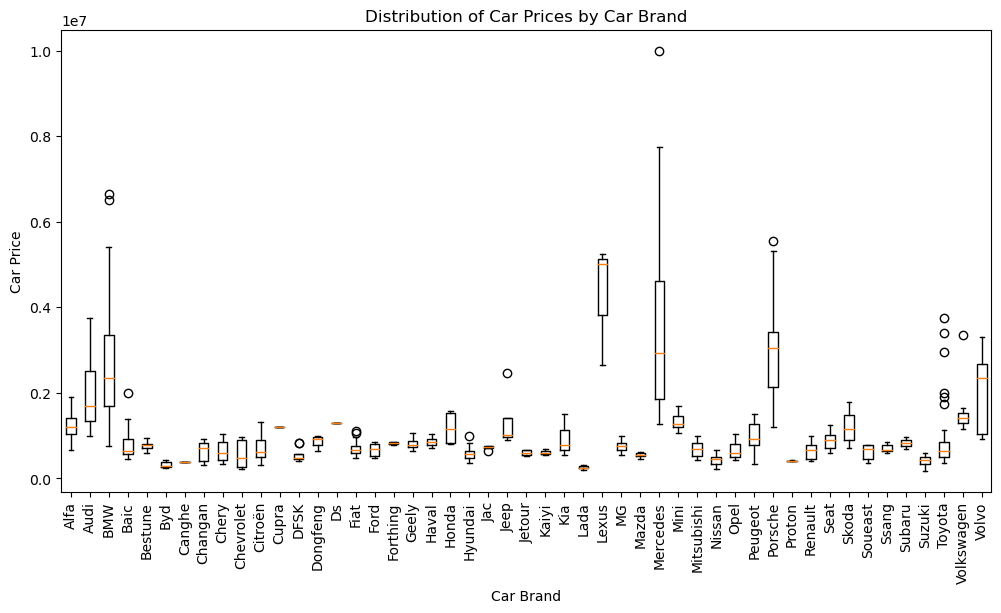

In [966]:
# Q5 What is the distribution of car prices across different car brands?

# Group the DataFrame by car brand and car model, sort by date
grouped_df = new_df.groupby(['Car Brand', 'Car Model']).apply(lambda x: x.sort_values('date_range', ascending=False).head(1))

# Reset the index to remove the ambiguity (Car Brand appears both as a column and row)
grouped_df.reset_index(drop=True, inplace=True)

# Get the car prices for each brand after selection
car_prices_by_brand = grouped_df.groupby('Car Brand')['New Price'].apply(list)

# Create a list of car brands and sort them
car_brands = sorted(new_df['Car Brand'].unique())

# Create a list of car prices for each brand
car_prices = [car_prices_by_brand[brand] for brand in car_brands]

# Create a box plot of car prices by car brand
plt.figure(figsize=(12, 6))
plt.boxplot(car_prices)
plt.xlabel('Car Brand')
plt.ylabel('Car Price')
plt.title('Distribution of Car Prices by Car Brand')

# Set the x-axis tick labels to the car brands
plt.xticks(range(1, len(car_brands) + 1), car_brands, rotation=90)

# Display the box plot
plt.show()


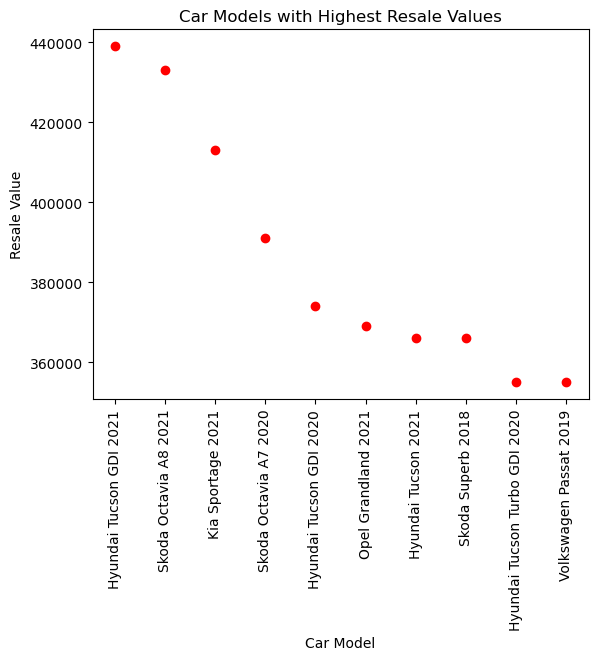

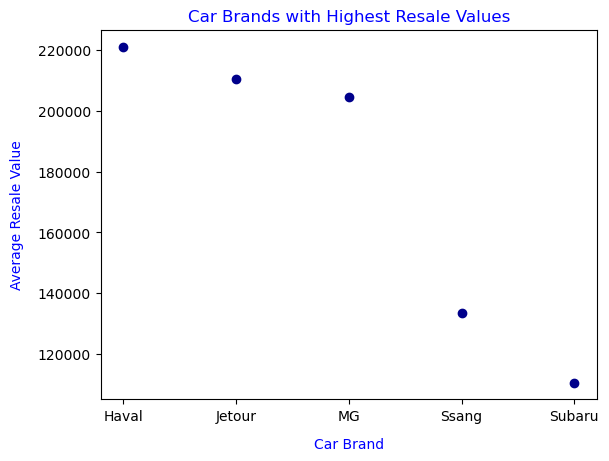

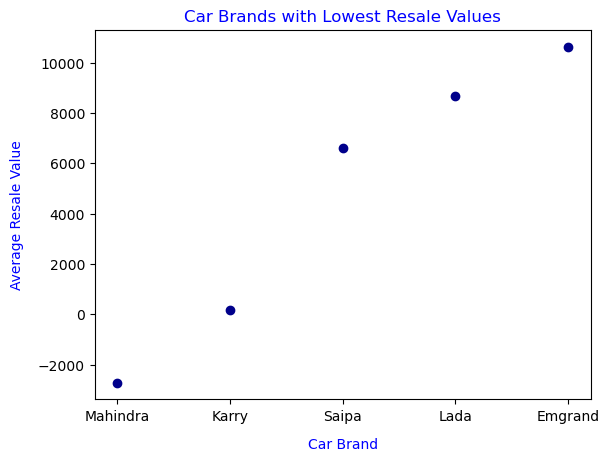

In [973]:
# Q6 Which car brand has the highest resale value?
# Car models with minimum 5 entries were considered
# Brands with minimum 10 entries were considered


# Convert the 'Date Range' column to datetime type
used_df['Date Range'] = pd.to_datetime(used_df['Month/Year'])
used_df2020 = used_df[used_df['Date Range'].dt.year >= 2019].copy()

# Calculate the price difference for each model
used_df2020['Price Difference'] = used_df2020.groupby('Car Model')['Average Price'].transform(lambda x: x.iloc[0] - x.iloc[-1])

# Count the number of entries for each car model
car_model_counts = used_df2020['Car Model'].value_counts()

# Filter the models with more than 5 entries
valid_models = car_model_counts[car_model_counts > 5].index

# Filter the data for valid car models
used_df2020_filtered = used_df2020[used_df2020['Car Model'].isin(valid_models)]

# Display the price difference for each model
model_price_difference = used_df2020_filtered.groupby('Car Model')['Price Difference'].first()

# Print the average resale prices for the top 5 car models
top_10_models = model_price_difference.nlargest(10)

# Create the line graph
plt.plot(top_10_models.index, top_10_models, marker='o', color='red', linestyle='')

plt.xlabel('Car Model')
plt.xticks(rotation=90)
plt.ylabel('Resale Value')
plt.title('Car Models with Highest Resale Values')
plt.show()

# Extract the brand name from the car model
used_df2020['Brand'] = used_df['Car Brand']

# Calculate the mean price difference for each brand
brand_mean_prices = used_df2020.groupby('Brand')['Price Difference'].mean()

# Count the number of entries for each brand
brand_counts = used_df2020['Brand'].value_counts()

# Filter the brands with more than 10 entries
valid_brands = brand_counts[brand_counts > 10].index

# Filter the data for valid brands
used_df2020_filtered = used_df2020[used_df2020['Brand'].isin(valid_brands)]

# Calculate the mean price difference for valid brands
brand_mean_prices_filtered = used_df2020_filtered.groupby('Brand')['Price Difference'].mean()

top_5_brands = brand_mean_prices_filtered.nlargest(5)
bottom_5_brands = brand_mean_prices_filtered.nsmallest(5)

# Create the line graph again for brands
plt.plot(top_5_brands.index, top_5_brands, marker='o', color='darkblue', linestyle='')
plt.xlabel('Car Brand', labelpad=10, color='blue')
plt.xticks(rotation=0)
plt.ylabel('Average Resale Value', labelpad=10, color='blue')
plt.title('Car Brands with Highest Resale Values', color='blue')
plt.show()

plt.plot(bottom_5_brands.index, bottom_5_brands, marker='o', color='darkblue', linestyle='')
plt.xlabel('Car Brand', labelpad=10, color='blue')
plt.xticks(rotation=0)
plt.ylabel('Average Resale Value', labelpad=10, color='blue')
plt.title('Car Brands with Lowest Resale Values', color='blue')
plt.show()


The brand which saw the highest rise in prices in second hand sales was Haval. While on the other hand, the brand which lost around 2000 EGP was Mahindra, with prices decreasing nominally even through soaring inflation and the Egyptian Pound's devauliation against the American Dollar.

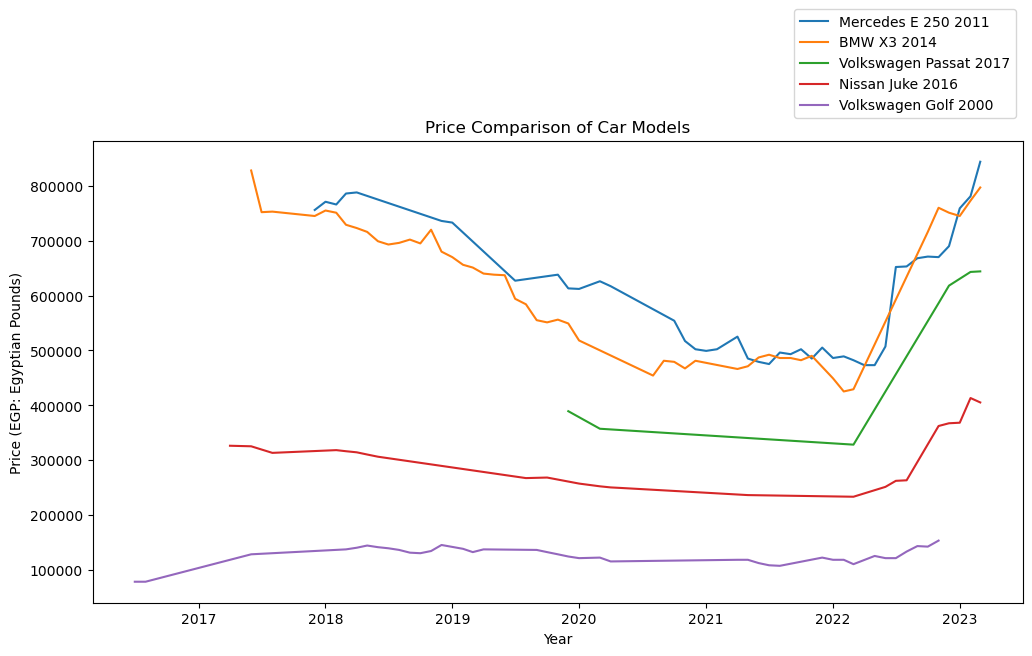

In [886]:
# Q7 How does the price of a car vary with its condition (i.e., new vs. used)?
# Since there were no common car models in used_df and new_df, price of used cars throughout the years were plotted 

# Filter the DataFrame for Nissan Juke 2016
nissan_juke_2016 = used_df[(used_df['Car Model'] == 'Nissan Juke 2016')]
nissan_juke_2016 = nissan_juke_2016.sort_values('Month/Year')

# Filter the DataFrame for Volkswagen Golf 2000
volkswagen_golf_2000 = used_df[(used_df['Car Model'] == 'Volkswagen Golf 2000')]
volkswagen_golf_2000 = volkswagen_golf_2000.sort_values('Month/Year')

# Filter the DataFrame for Mercedes E 250 2011
mercedes_e250_2011 = used_df[(used_df['Car Model'] == 'Mercedes E 250 2010')]
mercedes_e250_2011 = mercedes_e250_2011.sort_values('Month/Year')

# Filter the DataFrame for BMW X3 2014
bmw_x3_2014 = used_df[(used_df['Car Model'] == 'BMW X3 2014')]
bmw_x3_2014 = bmw_x3_2014.sort_values('Month/Year')

# Filter the DataFrame for Volkswagen Passat 2017
volkswagen_passat_2017 = used_df[(used_df['Car Model'] == 'Volkswagen Passat 2017')]
volkswagen_passat_2017 = volkswagen_passat_2017.sort_values('Month/Year')

# Create the line plot
plt.figure(figsize=(12, 6))

plt.plot(mercedes_e250_2011['Month/Year'], mercedes_e250_2011['Average Price'], label='Mercedes E 250 2011')
plt.plot(bmw_x3_2014['Month/Year'], bmw_x3_2014['Average Price'], label='BMW X3 2014')
plt.plot(volkswagen_passat_2017['Month/Year'], volkswagen_passat_2017['Average Price'], label='Volkswagen Passat 2017')
plt.plot(nissan_juke_2016['Month/Year'], nissan_juke_2016['Average Price'], label='Nissan Juke 2016')
plt.plot(volkswagen_golf_2000['Month/Year'], volkswagen_golf_2000['Average Price'], label='Volkswagen Golf 2000')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Price (EGP: Egyptian Pounds)')
plt.title('Price Comparison of Car Models')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=1)

# Display the line plot
plt.show()

This graph shows the average price of several second hand models throughout the years. Overall, the prices seem to be decreasing slowly up until 2022. After 2022, prices seem to increase sharply, some models almost doubling in terms of price. Even the price of a Golf 2000 increased after 2022

In [976]:
# Q8 Is there a relationship between the price of a car and its brand?

new_df['date_range'] = pd.to_datetime(new_df['date_range'])
df_2022_last_month = new_df[(new_df['date_range'].dt.year == 2022) & (new_df['date_range'].dt.month == 12)]

df_2022 = new_df[(new_df['date_range'].dt.year == 2022)]


average_prices = new_df.groupby('Car Model')['New Price'].mean()
average_prices_2020 = df_2022.groupby('Car Model')['New Price'].mean()
average_prices_2020_last = df_2022_last_month.groupby('Car Model')['New Price'].mean()


model_df_general = pd.DataFrame({'Model Code': range(1, len(average_prices) + 1),
                       'Price': average_prices.values})

model_df_2020 = pd.DataFrame({'Model Code': range(1, len(average_prices_2020) + 1),
                       'Price': average_prices_2020.values})

model_df_2020_last = pd.DataFrame({'Model Code': range(1, len(average_prices_2020_last) + 1),
                       'Price': average_prices_2020_last.values})



In [977]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [978]:
X_general = model_df_general[['Model Code']]
y_general = model_df_general['Price']

# Create an instance of the LinearRegression model and fit model to the data
model_general = LinearRegression().fit(X_general, y_general)

print("Coefficients:", model_general.coef_)
print("Intercept:", model_general.intercept_)

r_sq = model_general.score(X_general, y_general)
print(f"coefficient of determination: {r_sq}")

X_general = sm.add_constant(X_general)

model = sm.OLS(y_general, X_general).fit()

# Generate the summary of the regression results
summary = model.summary()

# Print the summary
print("\n")
print(summary)

Coefficients: [-173.22550094]
Intercept: 1020193.1128766586
coefficient of determination: 0.0010745558464357874


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6895
Date:                Sat, 24 Jun 2023   Prob (F-statistic):              0.407
Time:                        16:08:35   Log-Likelihood:                -9783.0
No. Observations:                 643   AIC:                         1.957e+04
Df Residuals:                     641   BIC:                         1.958e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [979]:
X_2020 = model_df_2020[['Model Code']]
y_2020 = model_df_2020['Price']

# Create an instance of the LinearRegression model and fit model to the data
model_2020 = LinearRegression().fit(X_2020, y_2020)

print("Coefficients:", model_2020.coef_)
print("Intercept:", model_2020.intercept_)

r_sq = model_2020.score(X_2020, y_2020)
print(f"coefficient of determination: {r_sq}")

X_2020 = sm.add_constant(X_2020)

model = sm.OLS(y_2020, X_2020).fit()

# Generate the summary of the regression results
summary = model.summary()

print("\n")
print(summary)

Coefficients: [403.74039614]
Intercept: 612937.5401948048
coefficient of determination: 0.006930090777421571


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.378
Date:                Sat, 24 Jun 2023   Prob (F-statistic):             0.0667
Time:                        16:08:35   Log-Likelihood:                -7215.1
No. Observations:                 486   AIC:                         1.443e+04
Df Residuals:                     484   BIC:                         1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [980]:
X_2020_last = model_df_2020_last[['Model Code']]
y_2020_last = model_df_2020_last['Price']

# Create an instance of the LinearRegression model and fit model to the data
model_general = LinearRegression().fit(X_2020_last, y_2020_last)

print("Coefficients:", model_general.coef_)
print("Intercept:", model_general.intercept_)

r_sq = model_general.score(X_2020_last, y_2020_last)
print(f"coefficient of determination: {r_sq}")

X_2020_last = sm.add_constant(X_2020_last)

model = sm.OLS(y_2020_last, X_2020_last).fit()

# Generate the summary of the regression results
summary = model.summary()

print("\n")
print(summary)

Coefficients: [-426.63235648]
Intercept: 1245581.9825572802
coefficient of determination: 0.00031814669918461824


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.05187
Date:                Sat, 24 Jun 2023   Prob (F-statistic):              0.820
Time:                        16:08:35   Log-Likelihood:                -2535.2
No. Observations:                 165   AIC:                             5074.
Df Residuals:                     163   BIC:                             5081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

Overall, there is no significant correlation between car model and car price as all p-values are larger than 0.05
However, there seems to be a some evidence against the null hypothesis when the entirety of 2020 is considered, with a p-value corresponding to 0.067